<h1>Capstone Project. Average Housing Prices in Downtown Toronto</h1>

<h3>Installing Libraries</h3>

In [2]:
!pip install geocoder
!pip install folium

In [3]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


<h3>Files</h3>

In [67]:
df = pd.read_csv('toronto_2.csv')
df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.808626,-79.189913
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785779,-79.157368
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765806,-79.185284
3,M1G,Scarborough,Woburn,43.771545,-79.218135
4,M1H,Scarborough,Cedarbrae,43.768791,-79.238813


In [68]:
df.describe()

,Latitude,Longitude
count,103.000000,103.000000
mean,43.704481,-79.394989
std,0.052814,0.094870
min,43.600895,-79.588351
25%,43.656781,-79.450931
50%,43.696448,-79.385653
75%,43.746551,-79.350151
max,43.834768,-79.157368


In [69]:
df = df.dropna()
empty = 'Not assigned'
df = df[(df.Postalcode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)]

In [70]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df_2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [71]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M3H')

[43.75739449200006, -79.44239439999996]

In [17]:
postal_codes = df_2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [72]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_2['Latitude'] = df_coords['Latitude']
df_2['Longitude'] = df_coords['Longitude']

In [73]:
df_2[df_2.Postalcode == 'M5G']

,Postalcode,Borough,Neighborhood,Latitude,Longitude
57,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653


In [74]:
df_2.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.808626,-79.189913
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785779,-79.157368
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765806,-79.185284
3,M1G,Scarborough,Woburn,43.771545,-79.218135
4,M1H,Scarborough,Cedarbrae,43.768791,-79.238813


In [75]:
address = 'Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto Canada are 43.6534817, -79.3839347.


In [76]:
map_Downtown = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Downtown)  
    
map_Downtown

In [77]:
address = 'Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Toronto Canada are 43.6534817, -79.3839347.


In [93]:
toronto_data = df[df['Borough'].str.contains("Downtown Toronto")].reset_index(drop=True)
print(toronto_data.shape)
toronto_data.head()

(18, 5)


,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.681893,-79.376706
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667656,-79.367326
2,M4Y,Downtown Toronto,Church and Wellesley,43.666659,-79.381472
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.650964,-79.353041
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657491,-79.377529


In [94]:
CLIENT_ID = 'AUF5FUNNYQS04LJGFMEZAU2HBYZR53HVFC5WLBCPOFBKGNIX' 
CLIENT_SECRET = '0XG41QCODO02CEY1W5GHVLRXS5R3AGIGG5TMSIQVHFLWQZ2H' # Put You Client Secret 
VERSION = '20200628'
LIMIT = 30

In [95]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [96]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [97]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [98]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Elgin And Winter Garden Theatres,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",43.653394,-79.378507
1,UNIQLO ユニクロ,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.655910,-79.380641
2,Indigo,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",43.653515,-79.380696
3,LUSH,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.653557,-79.380400
4,Yonge-Dundas Square,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",43.656054,-79.380495


In [99]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
1,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
2,Indigo,Bookstore,43.653515,-79.380696
3,LUSH,Cosmetics Shop,43.653557,-79.380400
4,Yonge-Dundas Square,Plaza,43.656054,-79.380495


In [100]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Coffee Shop                  10
Café                          6
Gastropub                     5
Japanese Restaurant           4
Restaurant                    4
Hotel                         3
Gym                           3
Theater                       2
Middle Eastern Restaurant     2
Gym / Fitness Center          2
Name: categories, dtype: int64

In [101]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [103]:
df = toronto_data
toronto_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'],longitudes=df['Longitude'])

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie


In [111]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,68,68,68,68,68,68
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",64,64,64,64,64,64
"Cabbagetown, St. James Town",47,47,47,47,47,47
Central Bay Street,60,60,60,60,60,60
"Chinatown, Grange Park, Kensington Market",46,46,46,46,46,46
Christie,11,11,11,11,11,11
Church and Wellesley,82,82,82,82,82,82
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [112]:
Downtown_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Downtown_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Downtown_onehot.columns[-1]] + list(Downtown_onehot.columns[:-1])
Downtown_onehot = Downtown_onehot[fixed_columns]
Downtown_grouped = Downtown_onehot.groupby('Neighborhood').mean().reset_index()
Downtown_onehot.head(5)

,Yoga Studio,Afghan Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [114]:
Downtown_grouped = Downtown_onehot.groupby('Neighborhood').mean().reset_index()
Downtown_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000,0.01,0.010000,0.000000,0.000000,0.01,0.010000,0.020000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.110000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.00,0.000000,0.01,0.000000,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.000000,0.010000,0.01,0.000000,0.000000,0.000000,0.040000,0.010000,0.0,0.000000,0.000000,0.00,0.030000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.010000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.050000,0.00,0.000000,0.030000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.01,0.00,0.000000,0.01000,0.0

In [116]:
num_top_venues = 5
for neigh in Downtown_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = Downtown_grouped[Downtown_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
            venue  freq
0     Coffee Shop  0.11
1            Café  0.06
2      Restaurant  0.05
3             Gym  0.04
4  Clothing Store  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1  Seafood Restaurant  0.04
2        Cocktail Bar  0.04
3         Cheese Shop  0.03
4      Breakfast Spot  0.03


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
               venue  freq
0        Coffee Shop  0.06
1               Café  0.06
2               Park  0.05
3  French Restaurant  0.05
4             Lounge  0.03


----Cabbagetown, St. James Town----
                venue  freq
0         Pizza Place  0.06
1         Coffee Shop  0.06
2                 Pub  0.04
3                Café  0.04
4  Chinese Restaurant  0.04


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.13
1  Japanese Restaurant  0.05
2       Clothing Store  0.05
3  

In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [118]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Downtown_grouped['Neighborhood']

for ind in np.arange(Downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Gym,Clothing Store,Hotel,Salad Place,Deli / Bodega,Thai Restaurant,Sushi Restaurant
1,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Bakery,Beer Bar,Cheese Shop,Lounge,Restaurant,Café,Hotel
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Café,Coffee Shop,French Restaurant,Park,Italian Restaurant,Restaurant,Speakeasy,Bar,Lounge,Gym / Fitness Center
3,"Cabbagetown, St. James Town",Pizza Place,Coffee Shop,Pet Store,Italian Restaurant,Café,Bakery,Restaurant,Pub,Chinese Restaurant,Park
4,Central Bay Street,Coffee Shop,Clothing Store,Sandwich Place,Japanese Restaurant,Middle Eastern Restaurant,Bubble Tea Shop,Italian Restaurant,Plaza,Bookstore,Ramen Restaurant


In [119]:
Downtown_grouped_clustering = Downtown_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Downtown_grouped_clustering)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2], dtype=int32)

In [121]:
neighborhoods_venues_sorted.insert(0, 'Clusters_ Labels', kmeans.labels_)

Downtown_merged =toronto_data.iloc[:16,:]

Downtown_merged = Downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Downtown_merged.head(100)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Clusters_ Labels,Cluster2 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.681893,-79.376706,1,1,Playground,Grocery Store,Park,Candy Store,Diner,Farm,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667656,-79.367326,2,2,Pizza Place,Coffee Shop,Pet Store,Italian Restaurant,Café,Bakery,Restaurant,Pub,Chinese Restaurant,Park
2,M4Y,Downtown Toronto,Church and Wellesley,43.666659,-79.381472,2,2,Coffee Shop,Japanese Restaurant,Restaurant,Gay Bar,Sushi Restaurant,Pub,Mediterranean Restaurant,Men's Store,Bubble Tea Shop,Gym / Fitness Center
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.650964,-79.353041,2,2,Pub,Café,Coffee Shop,Athletics & Sports,Mediterranean Restaurant,Chocolate Shop,French Restaurant,Distribution Center,Bank,Bakery
4,M5B,Downtown Toronto,"Ryerson, Garden District",43.657491,-79.377529,2,2,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Café,Sandwich Place,Bar,Cosmetics Shop,Lounge,Tanning Salon,Pizza Place
5,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554,2,2,Coffee Shop,Café,American Restaurant,Gastropub,Restaurant,Cosmetics Shop,Cocktail Bar,Gym,Japanese Restaurant,Hotel
6,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855,2,2,Coffee Shop,Seafood Restaurant,Cocktail Bar,Bakery,Beer Bar,Cheese Shop,Lounge,Restaurant,Café,Hotel
7,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653,2,2,Coffee Shop,Clothing Store,Sandwich Place,Japanese Restaurant,Middle Eastern Restaurant,Bubble Tea Shop,Italian Restaurant,Plaza,Bookstore,Ramen Restaurant
8,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650542,-79.384116,2,2,Coffee Shop,Café,Restaurant,Gym,Clothing Store,Hotel,Salad Place,Deli / Bodega,Thai Restaurant,Sushi Restaurant
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.623750,-79.369200,0,0,Harbor / Marina,Park,Farm,Theme Park,Fast Food Restaurant,Creperie,Dog Run,Farmers Market,Convenience Store,Falafel Restaurant


<h3>Clustering</h3>

In [122]:
kclusters = 10

In [124]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)

markers_colors = []
for lat, lon, nei , cluster in zip(Downtown_merged['Latitude'], 
                                   Downtown_merged['Longitude'], 
                                   Downtown_merged['Neighborhood'], 
                                   Downtown_merged['Clusters_ Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [126]:
df1=Downtown_merged.loc[Downtown_merged['Clusters_ Labels'] == 0,Downtown_merged.columns[[2] + list(range(5, Downtown_merged.shape[1]))]]
df2=Downtown_merged.loc[Downtown_merged['Clusters_ Labels'] == 1,Downtown_merged.columns[[2] + list(range(5, Downtown_merged.shape[1]))]]
df3=Downtown_merged.loc[Downtown_merged['Clusters_ Labels'] == 2,Downtown_merged.columns[[2] + list(range(5, Downtown_merged.shape[1]))]]

In [141]:
Downtown_Avg_HousingPrice=pd.DataFrame({"Neighborhood":toronto_data["Neighborhood"],
                                      "Average_Housing_Price":[
                                                            
                                          3233900.0,
                                          1653900.0,
                                          768000.0,
                                          680500.0,
                                          770500.0,
                                          1213500.0,
                                          1159200.0,
                                          789200.0,
                                          1071000.0,
                                          870500.0,
                                          955400.0,
                                          2583500.0,
                                          1533500.0,
                                          1735000.0,1086600.0
                                          ,995000.0,
                                          755900.0,
                                          1559400.0
                                    
                                                              
                                                              
                                                              ]})


In [142]:
Downtown_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

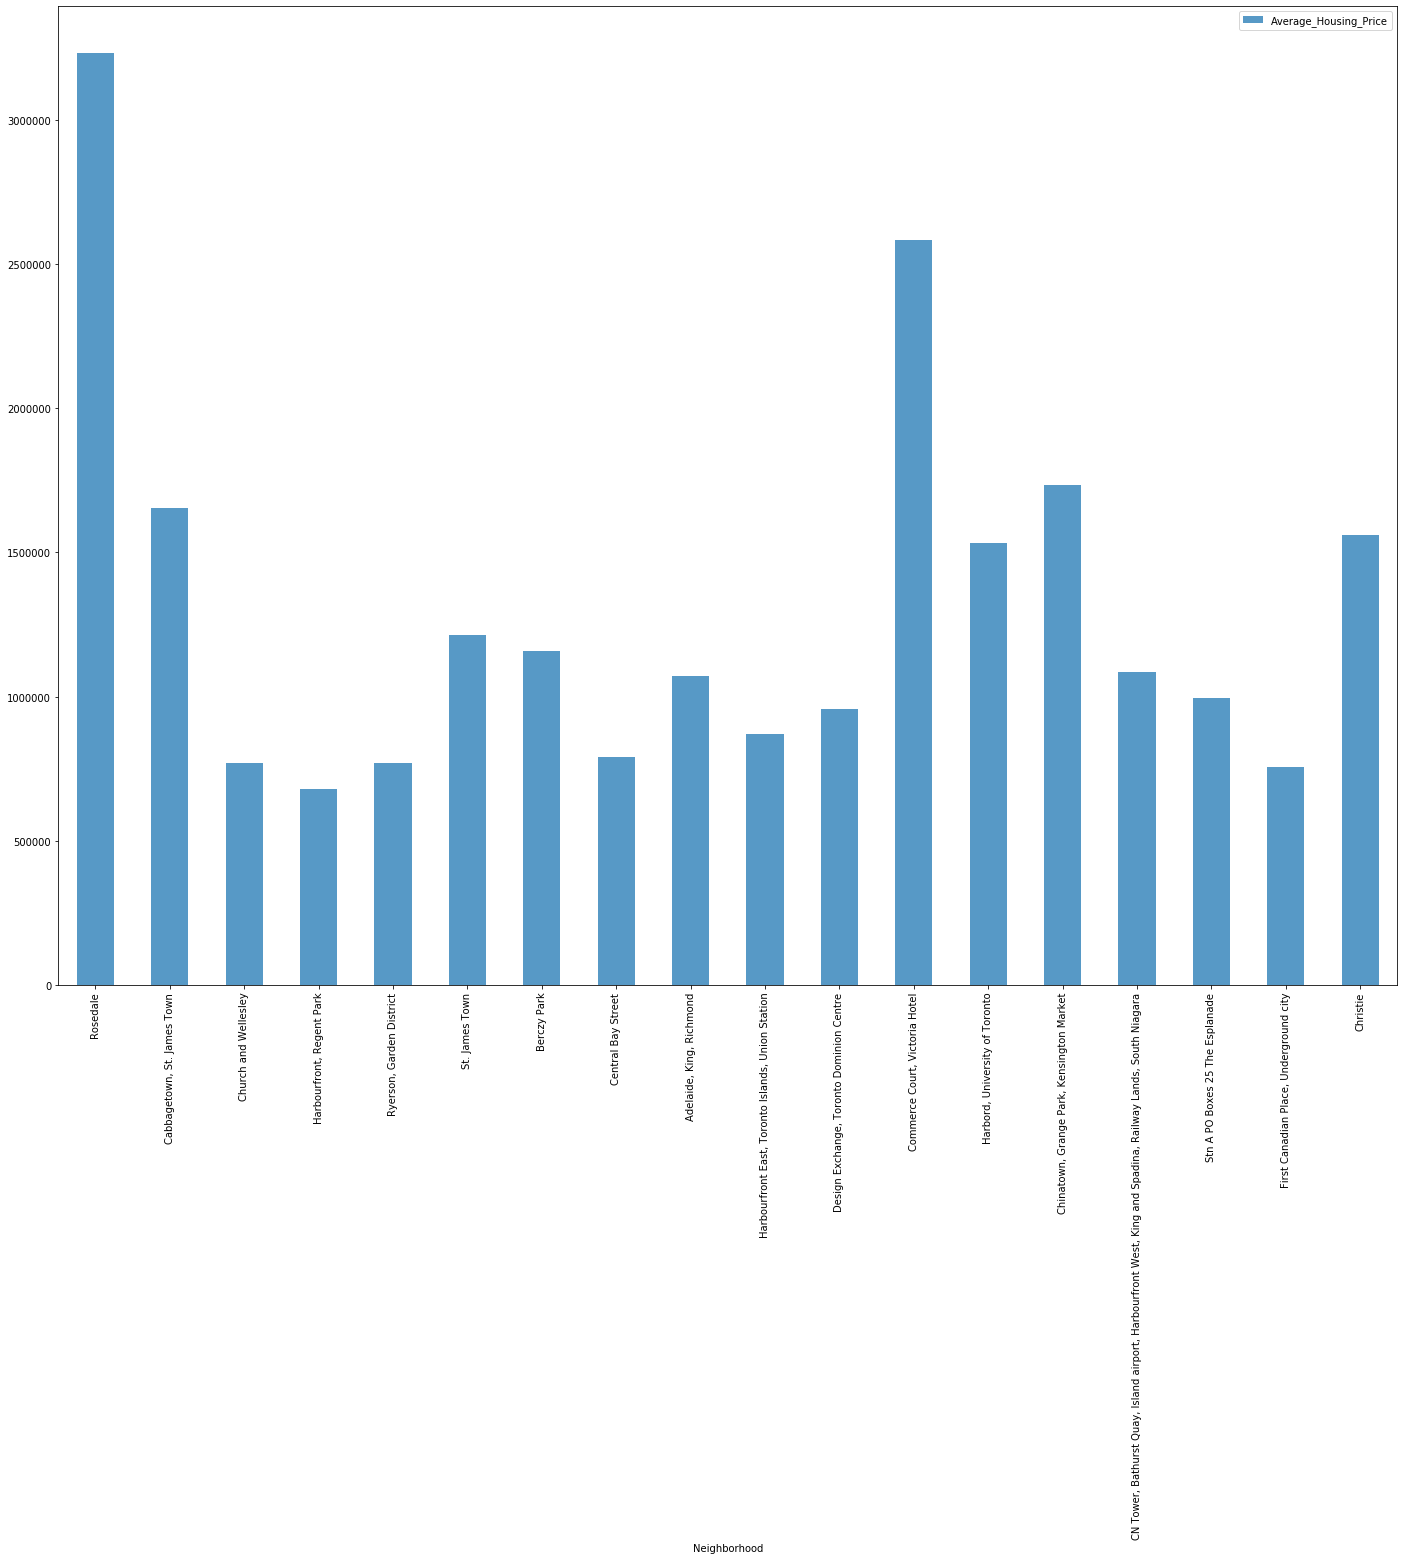

In [143]:
Downtown_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

<h2>Project ends here. Thank You!</h2>